In [519]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import autograd.numpy as np_   # Thinly-wrapped version of Numpy
from autograd import grad
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [520]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df = df.dropna() # Dropa linhas com valores nulos, pois são poucas linhas em relação ao total
df = df[df["gender"] != "Other"] # Dropa linha onde gender = other, pois é apenas uma linha
df.replace({"stroke": 0}, -1, inplace=True) # Substitui 0 por -1, para facilitar a classificação
df["stroke"].value_counts() # Conta valores de stroke

stroke
-1    4699
 1     209
Name: count, dtype: int64

In [521]:
df_sem_stroke = df.drop(columns=["stroke", "id"]) # Remove coluna stroke e id, pois id é irrelevante e stroke é a variável alvo
df_sem_stroke = pd.get_dummies(df_sem_stroke, drop_first=True) # Transforma variáveis categóricas em variáveis binárias, drop_first=True para evitar dummy variable trap


In [522]:
X_train, X_test, y_train, y_test = train_test_split(df_sem_stroke, df["stroke"], train_size=0.5) # Divide o dataset em treino e teste

In [523]:
X_train.head() # Mostra as primeiras linhas do dataset de treino para verificar se está tudo ok


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4412,38.0,0,0,151.26,20.6,False,True,False,True,False,False,True,False,True,False
3344,41.0,0,0,70.55,44.2,True,False,False,True,False,False,True,False,False,False
4324,80.0,0,0,230.74,30.2,False,False,False,False,True,False,False,True,False,False
224,49.0,0,0,104.86,31.9,True,False,False,True,False,False,False,False,False,True
904,25.0,0,0,63.64,31.3,False,True,False,True,False,False,False,True,False,False


In [524]:
# Transforma o df em um numpy array
X_train = X_train.to_numpy(dtype=float).T
X_test = X_test.to_numpy(dtype=float).T
y_train = y_train.to_numpy(dtype=float).T
y_test = y_test.to_numpy(dtype=float).T
# Transpõe os arrays para que cada coluna seja uma amostra

In [525]:
def accuracy(y_test, y_est):
    return np.mean(np.sign(y_test)==np.sign(y_est)) # Calcula a acurácia, comparando os valores reais com os valores estimados

In [526]:
def loss( parametros ): # Essa função calcula o erro médio quadrático
    w, b, pontos, val = parametros # w é o vetor de pesos, b é o bias, pontos são os pontos de treino e val são os valores de treino
    est = w.T @ pontos + b
    mse = np_.mean( (est - val)**2)
    return mse

In [527]:
def datasets(df_sem_stroke, df): # Função que divide o dataset em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(df_sem_stroke, df["stroke"], train_size=0.5) # Divide o dataset em treino e teste

    # Transforma o df em um numpy array
    X_train = X_train.to_numpy(dtype=float).T # Transpõe o array para que cada coluna seja um ponto
    X_test = X_test.to_numpy(dtype=float).T # Transpõe o array para que cada coluna seja um ponto
    y_train = y_train.to_numpy(dtype=float).T # Transpõe o array para que cada coluna seja um ponto
    y_test = y_test.to_numpy(dtype=float).T # Transpõe o array para que cada coluna seja um ponto
    return X_train, X_test, y_train, y_test

In [528]:
def calcula_acuracia(df_sem_stroke, df):
    X_train, X_test, y_train, y_test = datasets(df_sem_stroke, df) # Divide o dataset em treino e teste

    g = grad(loss) # Calcula o gradiente da função loss

    w = np.random.randn(15 ,1) # Vetor de pesos
    w_ = w # Vetor de pesos inicial
    b = 0.0 # Viés / bias
    alpha = 10**-5 # Taxa de aprendizado

    for n in range(10000):
        grad_ = g( (w, b, X_train, y_train) )
        w -= alpha*grad_[0]
        b -= alpha*grad_[1]

    y_est = w.T @ X_test + b # Estimativa
    acc = accuracy(y_test, y_est) # Acurácia
    print(f"Accuracy -> {acc}")
    print("Vetor de pesos inicial:")
    print(w_)
    print("Vetor de pesos final:")
    print(w)

In [529]:
calcula_acuracia(df_sem_stroke, df) # Calcula a acurácia do modelo utilizando um vetor de pesos inicial aleatório

Accuracy -> 0.8072534637326814
Vetor de pesos inicial:
[[ 0.02689834]
 [ 0.88244578]
 [-0.61236266]
 [-0.00284102]
 [-0.00811   ]
 [ 0.06783701]
 [-1.97426622]
 [ 0.06299729]
 [-1.10246713]
 [-0.68772231]
 [ 0.00314731]
 [-0.0974599 ]
 [ 1.40484695]
 [ 0.33748907]
 [ 1.19642235]]
Vetor de pesos final:
[[ 0.02689834]
 [ 0.88244578]
 [-0.61236266]
 [-0.00284102]
 [-0.00811   ]
 [ 0.06783701]
 [-1.97426622]
 [ 0.06299729]
 [-1.10246713]
 [-0.68772231]
 [ 0.00314731]
 [-0.0974599 ]
 [ 1.40484695]
 [ 0.33748907]
 [ 1.19642235]]


In [530]:
# Resultados com maiores acurácias encontrados para diferentes valores de w, gerados aleatoriamente

w = np.array([[-0.24729168], [ 0.19434991], [ 0.23773054], [-1.9376755 ], [-0.23193858], [-0.22393396], [-0.20263472], [-0.53630738], [-0.3324345 ], [ 0.77656376], [ 0.77629564], [ 0.08099956], [-0.49731736], [ 1.18405913], [ 1.15017974]])
res = "Accuracy -> 0.8577832110839446"

w = np.array([[ 1.27422892], [ 0.57788955], [-1.15704503], [ 1.14186603], [ 0.56864049], [ 0.1354915 ], [ 1.04160439], [ 0.11069598], [-0.12440809], [ 0.21981187], [-0.31045596], [ 0.13195825], [ 0.69889204], [-0.26012764], [ 0.05030163]])
res = "Accuracy -> 0.8944580277098615"

w = np.array([[1.27422892],[0.57788955],[-1.15704503],[1.14186603],[0.56864049],[0.1354915],[1.04160439],[0.11069598],[-0.12440809],[0.21981187],[-0.31045596],[0.13195825],[0.69889204],[-0.26012764],[0.05030163]])
res = "Accuracy -> 0.8973105134474327"

w = np.array([[1.27422892],[0.57788955],[-1.15704503],[1.14186603],[0.56864049],[0.1354915],[1.04160439],[0.11069598],[-0.12440809],[0.21981187],[-0.31045596],[0.13195825],[0.69889204],[-0.26012764],[0.05030163]])
res = "Accuracy -> 0.9070904645476773"

In [542]:
# Compara a acurácia do modelo com a acurácia de um modelo que sempre chuta -1

def calcula_acuracia_chute(df_sem_stroke, df):
    X_train, X_test, y_train, y_test = datasets(df_sem_stroke, df) # Divide o dataset em treino e teste

    y_est = np.ones(y_test.shape) * -1 # Chute
    acc = accuracy(y_test, y_est) # Acurácia
    print(f"Accuracy -> {acc}")

calcula_acuracia_chute(df_sem_stroke, df) # Calcula a acurácia do modelo que sempre chuta -1

Accuracy -> 0.9555827220863896


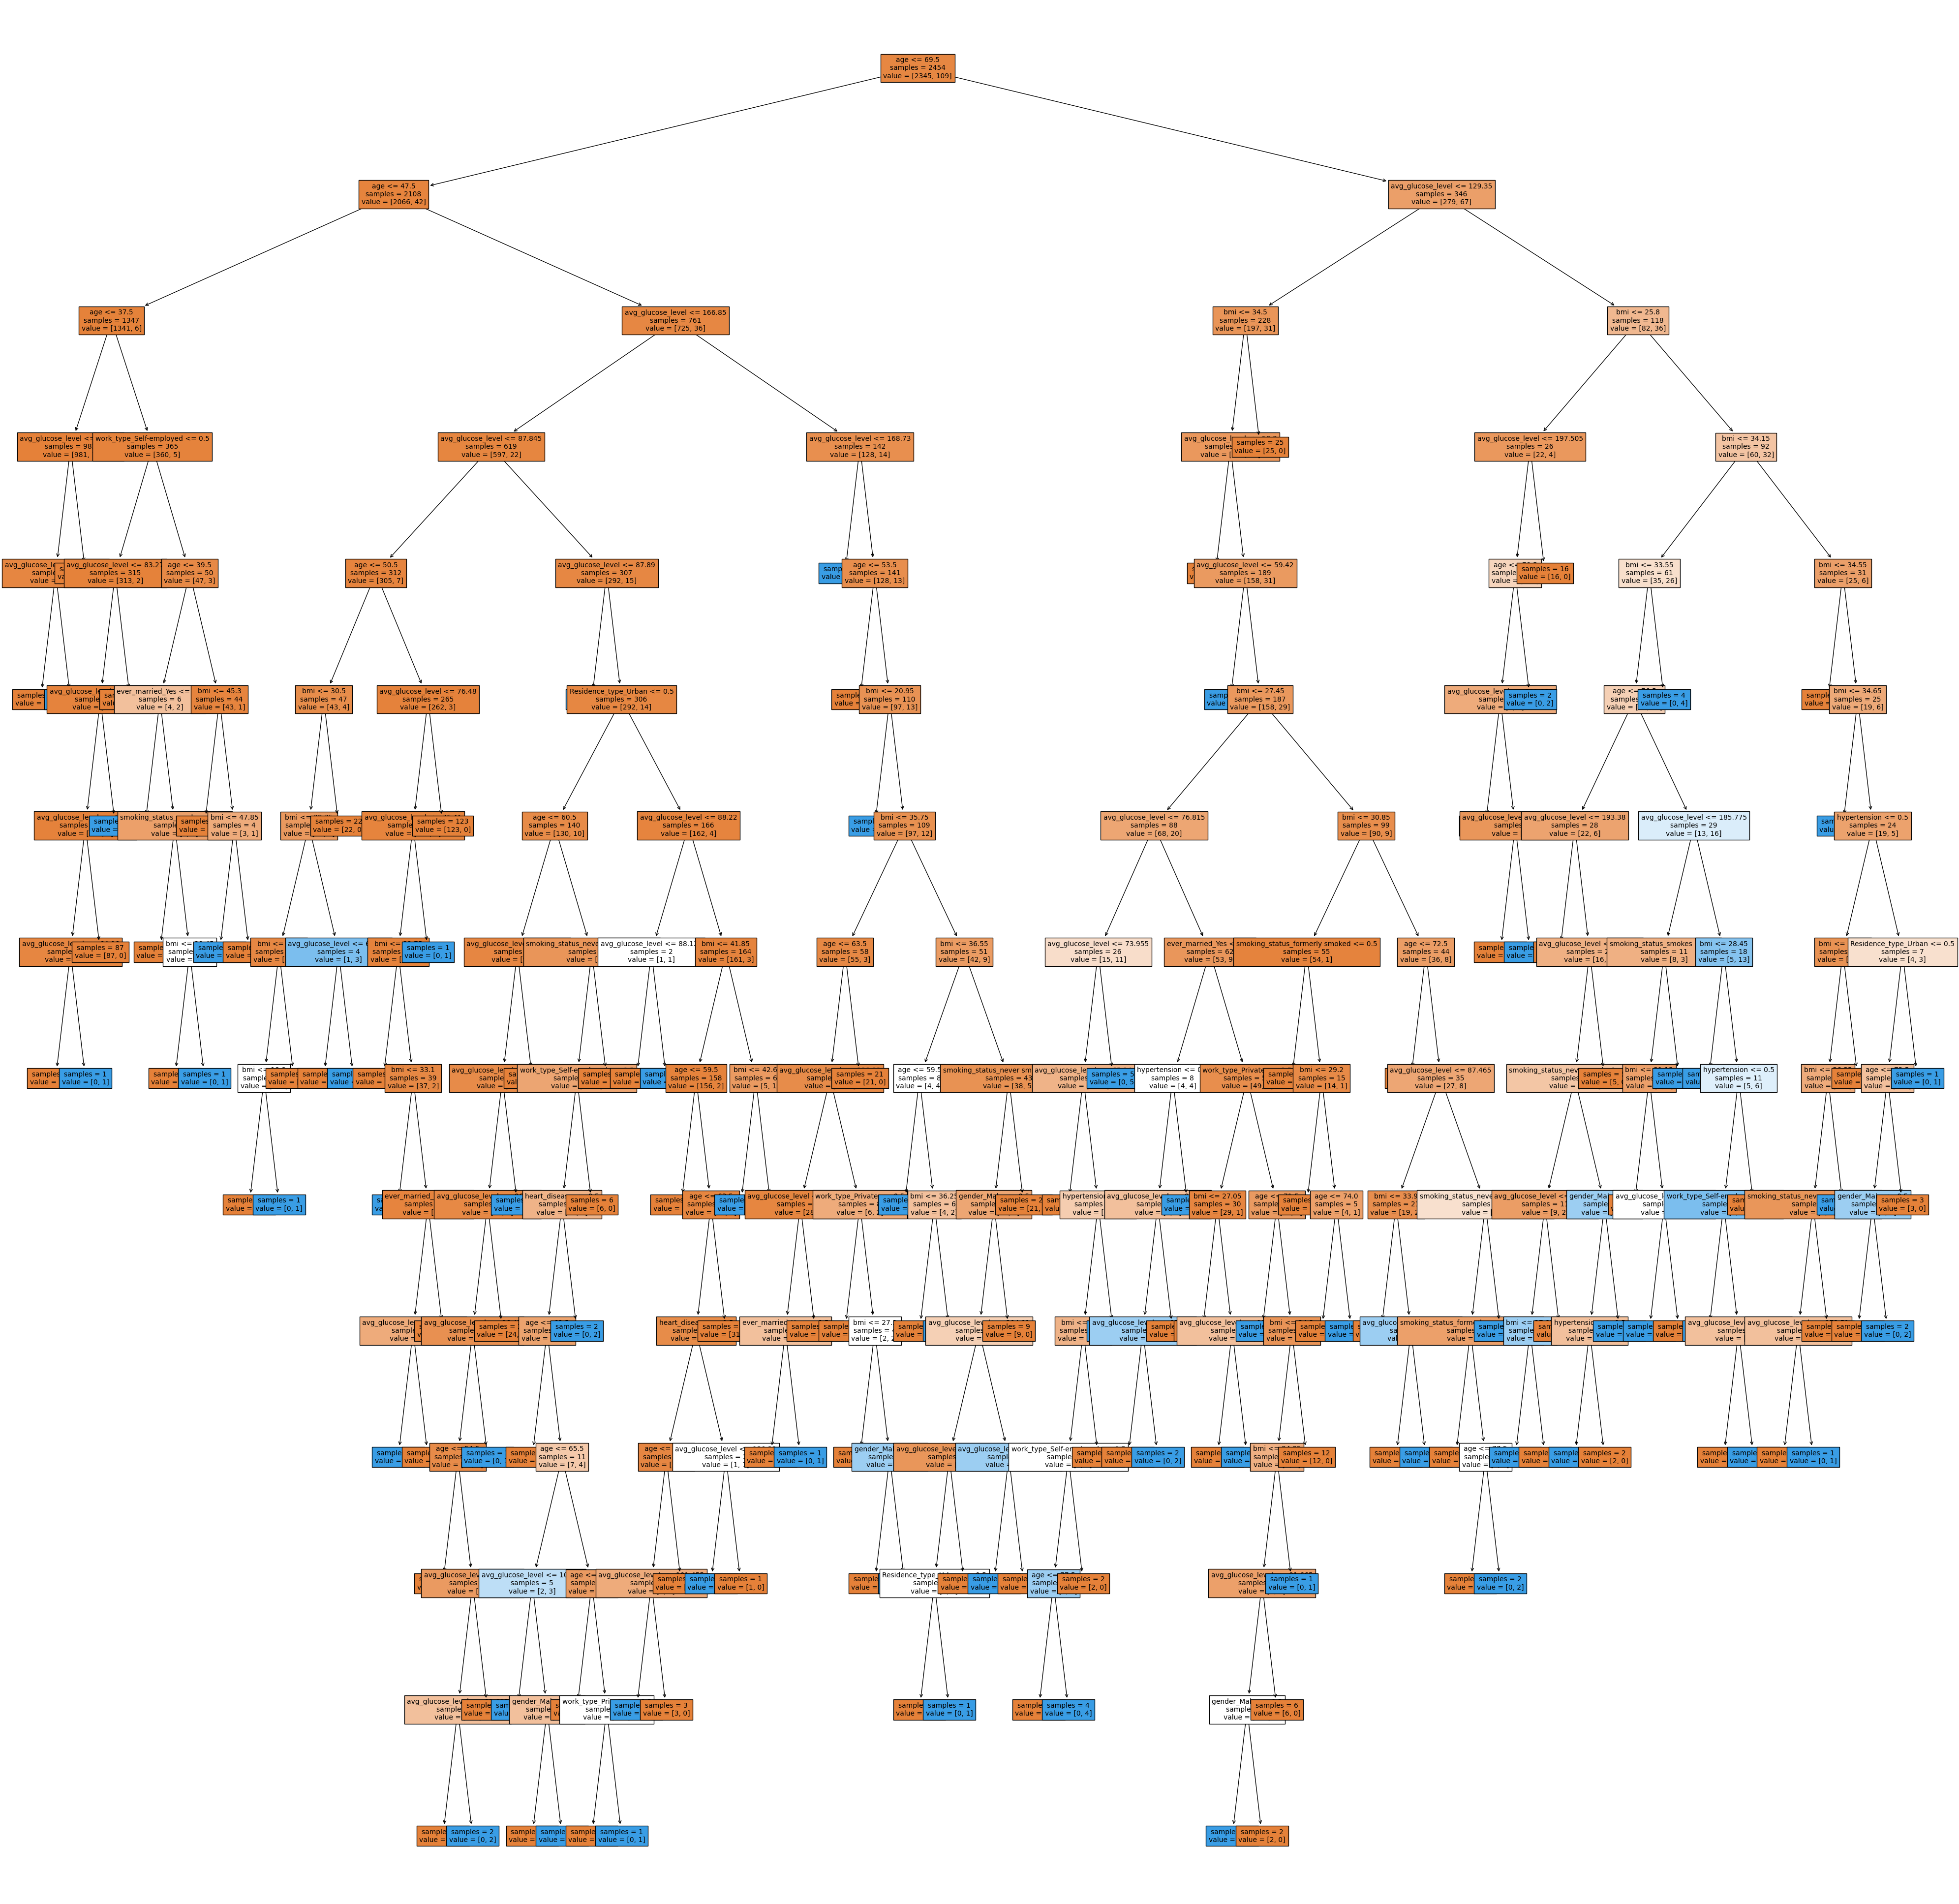

In [532]:
# Árvore de decisão usando o pacote sklearn:
tree = DecisionTreeClassifier(criterion='entropy') # Instancia a árvore de decisão

X_train, X_test, y_train, y_test = train_test_split(df_sem_stroke, df["stroke"], train_size=0.5) # Divide o dataset em treino e teste

# Usando o método .fit() para ajustar os parâmetros da árvore:
tree.fit(X_train, y_train)

# Podemos visualizar a árvore de decisão em uma figura!
plt.figure( figsize=(50,50) ) # Tamanho da figura
a = plot_tree(tree, feature_names=list(X_train.columns), fontsize=10, 
              node_ids=False, impurity=False, filled=True) # Plota a árvore

In [533]:
# Calcula a acurácia do modelo de árvore de decisão
y_est = tree.predict(X_test) # Estimativa do modelo de árvore de decisão
acc = accuracy(y_test, y_est) # Acurácia
print(f"Accuracy -> {acc}")

Accuracy -> 0.9180929095354523


In [534]:
# Encontrando quais são os principais fatores que influenciam a decisão da árvore:
importances = tree.feature_importances_ # Importância de cada feature
indices = np.argsort(importances)[::-1] # Ordena as importâncias em ordem decrescente
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f+1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]})") # Printa a importância de cada feature

Feature ranking:
1. feature age (0.3236813169136537)
2. feature avg_glucose_level (0.3103036979237614)
3. feature bmi (0.19680166078152891)
4. feature smoking_status_never smoked (0.03197571667374722)
5. feature gender_Male (0.030360516716059053)
6. feature hypertension (0.023025837338314377)
7. feature ever_married_Yes (0.02035841166025618)
8. feature work_type_Self-employed (0.020204083445417926)
9. feature work_type_Private (0.010254506899997096)
10. feature Residence_type_Urban (0.009701942211194426)
11. feature heart_disease (0.0096258405101061)
12. feature smoking_status_formerly smoked (0.007972672617212156)
13. feature smoking_status_smokes (0.005733796308751442)
14. feature work_type_children (0.0)
15. feature work_type_Never_worked (0.0)


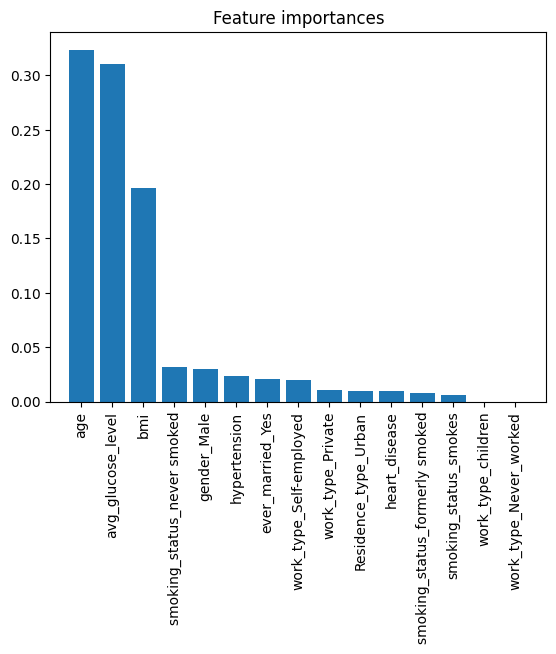

In [535]:
# Gráfico de barras para visualizar a importância de cada feature:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()